<a href="https://colab.research.google.com/github/tsakailab/iip/blob/main/sandbox/geometric_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pytorch.org/vision/stable/transforms.html

# download data

--2021-11-17 06:40:34--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/RYB_Color_wheel.png/320px-RYB_Color_wheel.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16019 (16K) [image/png]
Saving to: ‘target_img.tif’

target_img.tif      100%[===================>]  15.64K  --.-KB/s    in 0.003s  

2021-11-17 06:40:34 (5.24 MB/s) - ‘target_img.tif’ saved [16019/16019]



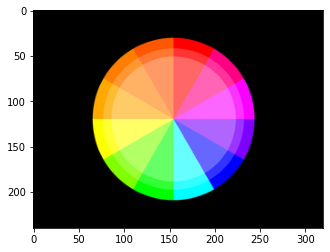

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch

!wget https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/RYB_Color_wheel.png/320px-RYB_Color_wheel.png -O target_img.tif
target = Image.open("target_img.tif")
target = target.convert('RGB')
target = np.array(target)
plt.imshow(target,cmap='gray')

target = torch.tensor(target).permute(2, 0, 1)

# set transformation

In [143]:
from torchvision import transforms
print(target.shape)
transform = transforms.Compose(
    [
     transforms.RandomRotation((0, 0)),         # transforms.RandomRotation((-180, 180))
     transforms.Resize(int(target.shape[1])),   # transforms.Resize(int(target.shape[1]*0.5))
     transforms.RandomInvert(p=0),              # transforms.RandomInvert(p=1.)
     transforms.RandomHorizontalFlip(p=0),      # transforms.RandomHorizontalFlip(p=1)
     transforms.RandomVerticalFlip(p=0),        # transforms.RandomVerticalFlip(p=1)
])

torch.Size([3, 240, 320])


# apply transformation

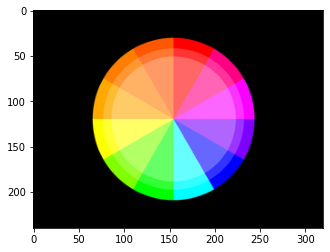

In [144]:
result = transform(target)
plt.imshow(result.permute(1,2,0))